In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [7]:
# Organize data into train, valid, test dirs
os.chdir(r"C:\Users\ADITYA\OneDrive\Desktop\ML\Sign Launguage Image Classification\Dataset")
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [8]:
train_path = r"C:\Users\ADITYA\OneDrive\Desktop\ML\Sign Launguage Image Classification\Dataset\train"
valid_path = r"C:\Users\ADITYA\OneDrive\Desktop\ML\Sign Launguage Image Classification\Dataset\valid"
test_path = r"C:\Users\ADITYA\OneDrive\Desktop\ML\Sign Launguage Image Classification\Dataset\test"

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [9]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [10]:
x = mobile.layers[-6].output

In [11]:
output = Dense(units=10, activation='softmax')(x)

In [13]:
model = tf.keras.Model(inputs=mobile.input, outputs=output)

In [14]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [16]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=30,
          verbose=2
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 172 steps, validate for 30 steps
Epoch 1/30
172/172 - 210s - loss: 0.8247 - accuracy: 0.7512 - val_loss: 1.3839 - val_accuracy: 0.4633
Epoch 2/30
172/172 - 194s - loss: 0.1239 - accuracy: 0.9854 - val_loss: 1.0119 - val_accuracy: 0.6233
Epoch 3/30
172/172 - 203s - loss: 0.0447 - accuracy: 0.9994 - val_loss: 0.7820 - val_accuracy: 0.7667
Epoch 4/30
172/172 - 214s - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.7028 - val_accuracy: 0.8033
Epoch 5/30
172/172 - 217s - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.6291 - val_accuracy: 0.8233
Epoch 6/30
172/172 - 213s - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.5776 - val_accuracy: 0.8400
Epoch 7/30
172/172 - 181s - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.5490 - val_accuracy: 0.8333
Epoch 8/30
172/172 - 175s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.5183 - val_accuracy: 0.8633
Epoch 9/30
172/172 - 2275s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.4905 - val_accur

In [18]:
test_labels = test_batches.classes

In [19]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [20]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [1 0 0 0 0 0 0 4 0 0]
 [1 0 0 0 0 0 0 1 3 0]
 [0 0 0 0 0 0 0 0 0 5]]


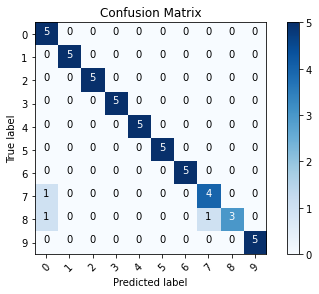

In [23]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')